In [1]:
import sys
sys.path.insert(1, '/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Code')
from functions import *
import seaborn as sns
import pandas as pd
from scipy import signal
from scipy.stats import exponnorm, gamma


/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


I'd like to check that my code roughly yields within-subject results similar to Grinband, Fig 3A.  I'm only trying to recreate the variable epoch model and variable impulse model results from that.

In [2]:
# From the paper, gamma with alpha (shape) = 1.7, beta = .4 (.49 in poster!), min = .5.  Maybe beta is scale and not rate?  
# They say mean = .84s, sd = .64s
# I checked with Jack and this is what they did.  Note, the scale was incorrect 
# in the paper.  Also, if you omit the loc, the mean and sd match the paper

rt_grinband_shift = gamma.rvs(a = 1.7, loc = .5, scale = .49, size = 10000)
print('using location parameter to shift')
print(rt_grinband_shift.mean())
print(rt_grinband_shift.std())

rt_grinband_not_shifted = gamma.rvs(a = 1.7, loc = 0, scale = .49, size = 10000)
print('Location parameter set to 0')
print(rt_grinband_not_shifted.mean())
print(rt_grinband_not_shifted.std())


using location parameter to shift
1.3287057043019073
0.6255392959758407
Location parameter set to 0
0.8386304029178248
0.6444656544684388


Out of curiousity, plotting some data sampled from the shifted Gamma distribution with the exponnorm fit of that data and the averaged data from the stroop task.  I was wondering how the distributions compared.

shape (k)=6.713622322810108, mu (loc)=646.0349863406904,sigma (scale)=101.68439652764548, inv_lam=682.6706344094754


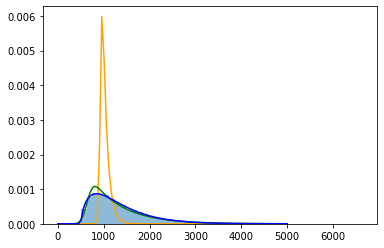

In [5]:

shape_grinband_shift, mu_grinband_shift, sigma_grinband_shift  = exponnorm.fit(rt_grinband_shift*1000)
inv_lambda_grinband_shift = np.multiply(sigma_grinband_shift, 
                                            shape_grinband_shift)
print(f'shape (k)={shape_grinband_shift}, mu (loc)={mu_grinband_shift},sigma (scale)={sigma_grinband_shift}, inv_lam={inv_lambda_grinband_shift}')
x_dist = np.linspace(0, 5000, 100)
expnorm_pdf_fit_rt_grinband_shift = exponnorm.pdf(x=x_dist, 
                                                    K=shape_grinband_shift, 
                                                    loc=mu_grinband_shift,
                                                    scale=sigma_grinband_shift)
gamma_pdf = gamma.pdf(x = x_dist, a = 1.7, loc = .5*1000, scale = .49*1000)

mu_other = 930
sigma_other = 31
lam_other = 1/95
shape_other  = 1 / (sigma_other * lam_other)
expnorm_other = exponnorm.pdf(x=x_dist, K=shape_other, 
                            loc=mu_other, scale=sigma_other)
 

fig, ax = plt.subplots(1, 1)
ax.hist(rt_grinband_shift*1000, 50,  density=True, alpha = .5)
ax.plot(x_dist, expnorm_other, 'orange')
ax.plot(x_dist, expnorm_pdf_fit_rt_grinband_shift, 'green')
ax.plot(x_dist, gamma_pdf, 'blue')
plt.show()


In [6]:
n_trials = 30
scan_length = 225
repetition_time = 1
# Parameters for RT distribution
# For midusref (avg within sub): mu=696.5963 sigma=118.8768 tau=202.3774 
#mu_expnorm = 530
#lam_expnorm = 1 / 170
#sigma_expnorm = 77

mu_expnorm = mu_grinband_shift
lam_expnorm = 1 / inv_lambda_grinband_shift
sigma_expnorm = sigma_grinband_shift

max_rt = 8000
min_rt = 50
event_duration = 2
ISI_min = 3
ISI_max = 6
beta_scales_yes = 1.5
beta_scales_no = 2
#noise_sd = .2
nsim = 100
center_rt=True

In [7]:
win_sub_noise_sd_vec = [.1, .2, .5, .7, 1, 1.25, 1.5,  2, 2.5, 3.5]
#win_sub_noise_sd_vec = [.1, .2, .5, .75,  1,  1.5,  2,  3.5]
#goal correlations: .03 (pow = 10%), .08 (30%), .11 (50%), .14 (70%), .15 (80%), .18 (90%)
ISI_min = 3
ISI_max = 6
cor_est_filt = []
cor_est_unfilt = []
for win_sub_noise_sd_loop in win_sub_noise_sd_vec:
    cor_est_unfilt_loop, _, cor_est_filt_loop = sim_avg_eff_size(500, n_trials, scan_length, repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_loop, center_rt,
              beta_scales_yes, beta_scales_no)
    cor_est_filt.append(cor_est_filt_loop)
    cor_est_unfilt.append(cor_est_unfilt_loop)

print(cor_est_filt)
print(cor_est_unfilt)

ISI_min = 1
ISI_max = 4 
cor_est_filt2 = []
cor_est_unfilt2 = []
for win_sub_noise_sd_loop in win_sub_noise_sd_vec:
    cor_est_unfilt_loop, _, cor_est_filt_loop = sim_avg_eff_size(500, n_trials, scan_length, repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_loop, center_rt,
              beta_scales_yes, beta_scales_no)
    cor_est_filt2.append(cor_est_filt_loop)
    cor_est_unfilt2.append(cor_est_unfilt_loop)
print(cor_est_filt2)
print(cor_est_unfilt2)

[0.8392461340842499, 0.6185249315910146, 0.30126941435072, 0.2201302277716789, 0.15808060531927337, 0.12596772908235285, 0.10728243760842103, 0.07818038534593177, 0.062420165222598994, 0.045360359760122065]
[0.8954300002972941, 0.7153104758722354, 0.3783770555576113, 0.2819275464886712, 0.20082087888423678, 0.16097849078516221, 0.13910834008185102, 0.09904825191996725, 0.08114930897704246, 0.057634495522928444]
[0.8581547076405652, 0.6467545756232275, 0.3217381358199567, 0.2318376443368682, 0.1646539634899438, 0.1339247430302528, 0.11113609498839679, 0.0866245818685674, 0.06768831770462719, 0.047538741212977284]
[0.945980873907276, 0.8242422559166778, 0.5027496056638622, 0.3850537661884987, 0.2757861460514123, 0.22718976356236953, 0.192166559726016, 0.14559180168495794, 0.11420331733984318, 0.08225149476949328]


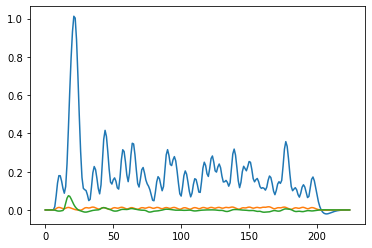

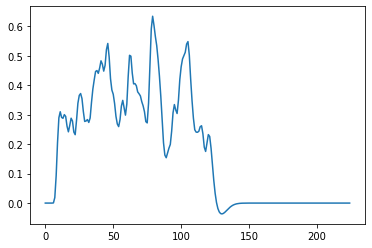

In [8]:
# plotting time series for the settings I"m using to make sure they aren't weird
ISI_min = 3.5
ISI_max = 6.5
regressors, mean_rt = make_regressors_one_trial_type(n_trials, scan_length, 
                                   repetition_time, mu_expnorm, 
                                   lam_expnorm, sigma_expnorm,
                                   max_rt, min_rt, event_duration, ISI_min, ISI_max, center_rt)

rt_dur = regressors['rt']['unmodulated']

plt.plot(rt_dur)
plt.plot(regressors['fixed_zero']['unmodulated'])
plt.plot(regressors['fixed_zero']['modulated'])
plt.show()

ISI_min = 1
ISI_max = 4
regressors, mean_rt = make_regressors_one_trial_type(n_trials, scan_length, 
                                   repetition_time, mu_expnorm, 
                                   lam_expnorm, sigma_expnorm,
                                   max_rt, min_rt, event_duration, ISI_min, ISI_max, center_rt)

rt_dur = regressors['rt']['unmodulated']

plt.plot(rt_dur)
plt.show()


In [9]:
nsim_pow = 1000
hp_filter = True
ISI_min = 4
ISI_max = 7
pow_var_epoch_mod_hp_yes, pow_unmod_var_impulse_hp_yes, pow_rtmod_var_impulse_hp_yes, _, _ = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_vec,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)
print('hp yes, ISI 3-6')
print(pow_var_epoch_mod_hp_yes)
print(pow_unmod_var_impulse_hp_yes)
print(pow_rtmod_var_impulse_hp_yes)

hp_filter = False
pow_var_epoch_mod_hp_no, pow_unmod_var_impulse_hp_no, pow_rtmod_var_impulse_hp_no, pow_unmod_fixed_event_dur_hp_no, pow_rtmod_fixed_event_dur_hp_no = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_vec,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)

print('hp no, ISI 3-6')
print(pow_var_epoch_mod_hp_no)
print(pow_unmod_var_impulse_hp_no)
print(pow_rtmod_var_impulse_hp_no)




#Change to shorter ISI
hp_filter = True
ISI_min = 2
ISI_max = 4
pow_var_epoch_mod_hp_yes2, pow_unmod_var_impulse_hp_yes2, pow_rtmod_var_impulse_hp_yes2, _, _ = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_vec,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)
print('hp yes, ISI U(1,4)')
print(pow_var_epoch_mod_hp_yes2)
print(pow_unmod_var_impulse_hp_yes2)
print(pow_rtmod_var_impulse_hp_yes2)

hp_filter = False
pow_var_epoch_mod_hp_no2, pow_unmod_var_impulse_hp_no2, pow_rtmod_var_impulse_hp_no2, pow_unmod_fixed_event_dur_hp_no2, pow_rtmod_fixed_event_dur_hp_no2 = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_vec,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)

hp yes, ISI 3-6
[1.0, 1.0, 0.992, 0.929, 0.686, 0.538, 0.408, 0.236, 0.161, 0.111]
[0.993, 0.981, 0.603, 0.367, 0.211, 0.155, 0.126, 0.083, 0.075, 0.065]
[1.0, 1.0, 0.911, 0.678, 0.401, 0.302, 0.223, 0.155, 0.089, 0.073]
hp no, ISI 3-6
[1.0, 1.0, 0.999, 0.95, 0.758, 0.559, 0.42, 0.262, 0.184, 0.117]
[0.999, 0.992, 0.762, 0.505, 0.273, 0.205, 0.153, 0.113, 0.093, 0.06]
[1.0, 1.0, 0.942, 0.72, 0.446, 0.302, 0.236, 0.171, 0.116, 0.083]
hp yes, ISI U(1,4)
[1.0, 1.0, 0.992, 0.894, 0.637, 0.475, 0.373, 0.226, 0.143, 0.109]
[0.999, 0.995, 0.728, 0.468, 0.262, 0.19, 0.142, 0.097, 0.071, 0.071]
[1.0, 1.0, 0.837, 0.601, 0.354, 0.27, 0.197, 0.136, 0.091, 0.093]


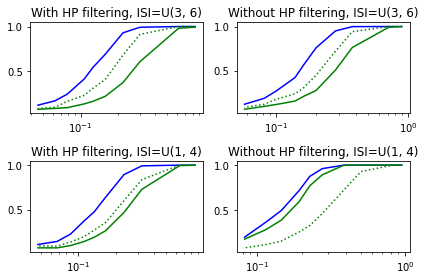

In [10]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cor_est_filt, pow_var_epoch_mod_hp_yes, 'b', label = 'var. epoch')
axs[0,0].plot(cor_est_filt, pow_unmod_var_impulse_hp_yes, 'g', label = 'const (var impulse)') 
axs[0,0].plot(cor_est_filt, pow_rtmod_var_impulse_hp_yes, 'g:', label = 'modulated (var impulse)')
axs[0,0].set_xscale('log') 
axs[0,0].set_title('With HP filtering, ISI=U(3, 6)')

axs[0,1].plot(cor_est_unfilt, pow_var_epoch_mod_hp_no, 'b')
axs[0,1].plot(cor_est_unfilt, pow_unmod_var_impulse_hp_no, 'g') 
axs[0,1].plot(cor_est_unfilt, pow_rtmod_var_impulse_hp_no, 'g:') 
axs[0,1].set_xscale('log') 
axs[0,1].set_title('Without HP filtering, ISI=U(3, 6)')

axs[1,0].plot(cor_est_filt2, pow_var_epoch_mod_hp_yes2, 'b')
axs[1,0].plot(cor_est_filt2, pow_unmod_var_impulse_hp_yes2, 'g') 
axs[1,0].plot(cor_est_filt2, pow_rtmod_var_impulse_hp_yes2, 'g:')
axs[1,0].set_xscale('log') 
axs[1,0].set_title('With HP filtering, ISI=U(1, 4)')

axs[1,1].plot(cor_est_unfilt2, pow_var_epoch_mod_hp_no2, 'b')
axs[1,1].plot(cor_est_unfilt2, pow_unmod_var_impulse_hp_no2, 'g') 
axs[1,1].plot(cor_est_unfilt2, pow_rtmod_var_impulse_hp_no2, 'g:') 
axs[1,1].set_xscale('log') 
axs[1,1].set_title('Without HP filtering, ISI=U(1, 4)')
fig.tight_layout()


plt.show()


In [11]:
#mu_expnorm = 530
#lam_expnorm = 1 / 170
#sigma_expnorm = 77

print(1/lam_expnorm)
print([mu_expnorm, lam_expnorm, sigma_expnorm] )

#shape (k)=6.912860569042246, mu (loc)=636.6639060655552,sigma (scale)=101.00937103153078, inv_lam=698.2636981076272

682.6706344094754
[646.0349863406904, 0.001464835236197059, 101.68439652764548]


In [12]:
nsim_pow = 500
win_sub_noise_sd_range = [.1, .2, .5, .7, 1, 1.25, 1.5,  2, 2.5, 3.5]


hp_filter = False
ISI_min_max_vec = [(1, 3), (1, 4), (1,5), (1,6), (2, 5), (3, 6), (4, 7), (5, 8)]
output = {}

for i in range(len(ISI_min_max_vec)):  
    #print(i)
    output[ISI_min_max_vec[i]] = {}
    _, cor_est_unfilt = calc_cor_over_noise_range(100, n_trials, scan_length, repetition_time, mu_expnorm,
                    lam_expnorm, sigma_expnorm, max_rt,
                    min_rt, event_duration, ISI_min_max_vec[i][0], ISI_min_max_vec[i][1], win_sub_noise_sd_range, center_rt,
                    beta_scales_yes, beta_scales_no)
    pow_var_epoch_mod, pow_unmod_var_impulse, pow_rtmod_var_impulse, _, _ = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min_max_vec[i][0], ISI_min_max_vec[i][1], win_sub_noise_sd_range,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)
    output[ISI_min_max_vec[i]]['correlation'] = cor_est_unfilt
    output[ISI_min_max_vec[i]]['power_var_epoch'] = pow_var_epoch_mod
    output[ISI_min_max_vec[i]]['pow_unmod_var_impulse'] = pow_unmod_var_impulse
    output[ISI_min_max_vec[i]]['pow_rtmod_var_impulse'] = pow_rtmod_var_impulse
  

In [13]:
print(len(output))
print(ISI_min)
print(ISI_max)
output.keys()
isi_labels = list(output.keys())
print(isi_labels[0])

for i in isi_labels:
    print(output[i]['correlation'])


8
2
4
(1, 3)
[0.9541342993690121, 0.8460363673986615, 0.5354263646856623, 0.419757710015379, 0.30534551654461856, 0.24133030082814422, 0.19608955660281577, 0.16931358469119298, 0.12994395782805984, 0.08591141051648549]
[0.9453103293588861, 0.8260172189593165, 0.49331543039954484, 0.39282796146941623, 0.28390787855188965, 0.22819757522206238, 0.18911702293682317, 0.14009341762391442, 0.11891302418508927, 0.08629657241240549]
[0.9380658603529025, 0.802394474783, 0.4862019696204689, 0.35417890237903477, 0.258486842037142, 0.21701240710403547, 0.17639740165901976, 0.11929769720273256, 0.10205040731898116, 0.0947904707724722]
[0.9279602990714533, 0.783748712552085, 0.4591508935863663, 0.3375969801594481, 0.2386944232505399, 0.20382953543952745, 0.15583264390041648, 0.13376586557118755, 0.09105922716449596, 0.06931014992987154]
[0.9238800009075966, 0.7658162756988116, 0.43154962570539673, 0.3264702688451962, 0.24008716190398335, 0.18390696544259044, 0.1649884682262398, 0.12579109385067713, 0

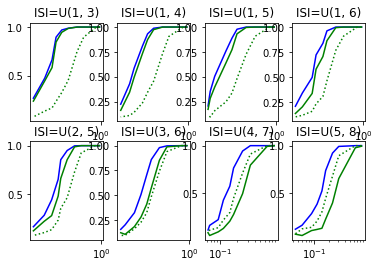

In [15]:
isi_labels = list(output.keys())
fig, axs = plt.subplots(2, 4)

for i in range(len(isi_labels)):
    axs[i//4, i%4].plot(output[isi_labels[i]]['correlation'], output[isi_labels[i]]['power_var_epoch'], 'b', label = 'var. epoch')
    axs[i//4, i%4].plot(output[isi_labels[i]]['correlation'], output[isi_labels[i]]['pow_unmod_var_impulse'], 'g', label = 'const (var impulse)') 
    axs[i//4, i%4].plot(output[isi_labels[i]]['correlation'], output[isi_labels[i]]['pow_rtmod_var_impulse'], 'g:', label = 'modulated (var impulse)')
    axs[i//4, i%4].set_xscale('log') 
    axs[i//4, i%4].set_title(f'ISI=U{isi_labels[i]}')
#fig.tight_layout()
plt.show()

In [16]:
win_sub_noise_sd_vec = [.25, .5, 1, 1.5, 2, 2.5]
nsim_pow = 1000
hp_filter = True
ISI_max = 8
scan_length = 430
pow_var_epoch_mod, pow_unmod_var_impulse, pow_rtmod_var_impulse, pow_unmod_fixed_event_dur, pow_rtmod_fixed_event_dur = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_vec,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)
print(pow_var_epoch_mod)
print(pow_unmod_var_impulse)
print(pow_rtmod_var_impulse)

hp_filter = False
pow_var_epoch_mod, pow_unmod_var_impulse, pow_rtmod_var_impulse, pow_unmod_fixed_event_dur, pow_rtmod_fixed_event_dur = calc_pow_range(n_trials, scan_length, 
             repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, win_sub_noise_sd_vec,  
              center_rt, beta_scales_yes, beta_scales_no, hp_filter, nsim_pow)
print(pow_var_epoch_mod)
print(pow_unmod_var_impulse)
print(pow_rtmod_var_impulse)

[1.0, 0.999, 0.742, 0.429, 0.241, 0.181]
[0.999, 0.858, 0.345, 0.172, 0.119, 0.089]
[1.0, 0.884, 0.392, 0.217, 0.14, 0.094]
[1.0, 1.0, 0.979, 0.764, 0.548, 0.375]
[1.0, 1.0, 0.926, 0.613, 0.396, 0.28]
[1.0, 0.932, 0.47, 0.234, 0.172, 0.114]


The power differences are due to a combination of ISI and the highpass filter.  Obviously if the frequency is <.1 the highpass filter will have an impact.  Going to look at the power spectra of the different types of regressors


In [ ]:

repetition_time = 1
n_trials = 30
scan_length = 200
# Parameters for RT distribution
# For midusref (avg within sub): mu=696.5963 sigma=118.8768 tau=202.3774 
mu_expnorm = 530
lam_expnorm = 1 / 170
sigma_expnorm = 77
max_rt = 8000 
min_rt = 50
event_duration =.5
ISI_min = 3
ISI_max = 9
beta_scales_yes = 1.5
beta_scales_no = 2
center_rt=True
win_sub_noise_sd = 1

regressors, mean_rt = make_regressors_one_trial_type(n_trials, scan_length, 
                                   repetition_time, mu_expnorm, 
                                   lam_expnorm, sigma_expnorm,
                                   max_rt, min_rt, event_duration, ISI_min, ISI_max, center_rt)

rt_dur = regressors['rt']['unmodulated']
fixed_dur_unmod = regressors['fixed_event_duration']['unmodulated']
time = np.arange(0,scan_length, 1)
f, rt_dur_period = signal.periodogram(rt_dur[:,0])
f, fixed_dur_unmod_period = signal.periodogram(fixed_dur_unmod[:,0])

contrasts = np.array([[1]])
model_mtx = np.ones(rt_dur.shape)
hp_filter = True

_, _, _, pred_rt_dur  = runreg(rt_dur, model_mtx, contrasts, 
            hp_filter, compute_stats=False)
resid_rt_dur = rt_dur - pred_rt_dur
f, resid_rt_dur_period = signal.periodogram(resid_rt_dur[:,0])

_, _, _, pred_fixed_dur_unmod  = runreg(fixed_dur_unmod, model_mtx, contrasts, 
            hp_filter, compute_stats=False)
resid_fixed_dur_unmod = fixed_dur_unmod - pred_fixed_dur_unmod
f, resid_fixed_dur_unmod_period = signal.periodogram(resid_fixed_dur_unmod[:,0])


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
ax[0,0].plot(time, rt_dur)    
ax[0,1].plot(f, rt_dur_period) 
ax[0,1].plot(f, resid_rt_dur_period) 
#ax[0,1].set_xlim([0, .1])
ax[1,0].plot(time, fixed_dur_unmod)    
ax[1,1].plot(f, fixed_dur_unmod_period) 
ax[1,1].plot(f, resid_fixed_dur_unmod_period) 
#ax[1,1].set_xlim([0, .1])



In [ ]:
ISI = 5

regressors, mean_rt = make_regressors_one_trial_type(n_trials, scan_length, 
                                   repetition_time, mu_expnorm, 
                                   lam_expnorm, sigma_expnorm,
                                   max_rt, min_rt, event_duration, ISI, center_rt)

rt_dur = regressors['rt']['unmodulated']
fixed_dur_unmod = regressors['fixed_event_duration']['unmodulated']
time = np.arange(0,scan_length, 1)
f, rt_dur_period = signal.periodogram(rt_dur[:,0])
f, fixed_dur_unmod_period = signal.periodogram(fixed_dur_unmod[:,0])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
ax[0,0].plot(time, rt_dur)    
ax[0,1].stem(f, rt_dur_period) 
ax[0,1].set_xlim([0, .1])
ax[1,0].plot(time, fixed_dur_unmod)    
ax[1,1].stem(f, fixed_dur_unmod_period) 
ax[1,1].set_xlim([0, .1])


In [ ]:
#debugging this bit of code

for sim in range(0, 1000):
    shape_expnorm = 1 / (sigma_expnorm * lam_expnorm)
    subject_specific_mu_expnorm = exponnorm.rvs(shape_expnorm, mu_expnorm,
                                                sigma_expnorm, 1) #- \
                                                #1 / lam_expnorm

    rt_trials_twice_what_needed = exponnorm.rvs(shape_expnorm,
                                                subject_specific_mu_expnorm,
                                                sigma_expnorm, n_trials * 2)
    rt_trials_filtered = rt_trials_twice_what_needed[
        np.where((rt_trials_twice_what_needed < max_rt) &
                 (rt_trials_twice_what_needed > min_rt))]
    print([rt_trials_filtered.shape[0], rt_trials_twice_what_needed.min(),
    rt_trials_twice_what_needed.max(), n_trials] )
    assert rt_trials_filtered.shape[0] >= n_trials